# TP 3 Regression linéaire
Dans ce TP, nous aimerions prédire l'admission d'un étudiant à une specialité donnée selon ses notes dans deux matières.

Pour ce faire, nous étudierons un ensemble de données avec l'admission  (y) et les notes des deux modules (X).

La prédiction se fera avec l'agorithme de descente du gradient.

Travail réalisé par

GHAMRACI RAHIL 202031025179 G1

BENZEMRANE LYDIA 202031084177 G1

# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
# données
data = np.genfromtxt('data.csv', delimiter=',')
data.shape

(100, 3)

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente l'admission à la specialité (1 admis 0 non admis).

Chaque ligne represente un exemple de notre ensemble de données.

Mettons ces données dans leus vecteurs correspondants.

In [ ]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2];


In [ ]:
print('X', X.shape ,' y ', y.shape)

X (100, 3)  y  (100,)


# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [ ]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    sig = 1 / ( 1 + np.exp(-1*z) )
    return sig

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [ ]:
def computeCostNonVect(X, y, theta):
    j=0
    m = X.shape[0]  #obtenir le nombre de lignes de la matrice X, ce qui correspond au nombre d'échantillons dans l'ensemble de données.
    for i in range(m): #Boucle sur chaque échantillon dans l'ensemble de données
      j += y[i] * np.log(Sigmoid(theta[2][0] * X[i][2] +theta[1][0] * X[i][1] + theta[0][0] * X[i][0])) + (1-y[i])  * np.log( 1 - Sigmoid(theta[2][0] * X[i][2] +theta[1][0] * X[i][1] + theta[0][0] * X[i][0])) #la somme des difference entre la valeur predite et la valeur reel
      # ou Sigmoid(theta[2][0] * X[i][2] +theta[1][0] * X[i][1] + theta[0][0] * X[i][0]) est la fonction h
    j /= (-1*m)  #la moyenne du cout
    return j
    # calculer le coût avec et sans vectorisation,
    # comparer le temps de traitement



In [ ]:
def computeCost(X, y, theta):
    m = X.shape[0]
    h = Sigmoid(np.matmul(X, theta))  # Calcul de h_theta(x)
    cost = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [ ]:
def est_proche_de_zero(nombre, tolérance=0.00000000000001): #la tolerance est trop petite car les valeurs de cout sont trop faibles
    return abs(nombre) <= tolérance     #utilisée pour vérifier si la mise à jour des paramètres a convergé vers une solution proche de zéro, ce qui indique une convergence vers un minimum local ou global de la fonction de coût.


**Calcul du gardien**

*Simplification de J(theta)*

J(theta) = -1/n Somme ( yi log( h(xi)) + (1- yi) log( 1 - h(xi))





log( 1/ ( 1+ expo( - theta T * xi))  = -log(  1+ expo( - theta T * xi) )






log( 1 - ( 1/ ( 1+ expo( - theta T * xi) ) ) ) =  log( expo( - theta T * xi)/ (1+ expo( - theta T * xi)) )

= log( expo( - theta T * xi) ) - log((1+ expo( - theta T * xi))
= - theta T xi - log(1+ expo( - theta T * xi))

la fonction de cout devient alors:

J(theta) = -1/n Somme ( -yi log(  1+ expo( - theta T * xi) ) + (1- yi) (- theta T xi - log(1+ expo( - theta T * xi)) )

= -1/n Somme ( -yi log( 1+ expo( - theta T * xi) ) - theta T xi  - log(1+ expo( - theta T * xi)) + yi * theta T xi + yi  log(1+ expo( - theta T * xi)) )

= -1/n Somme ( - theta T xi  - log(1+ expo( - theta T * xi))  + yi * theta T xi  )

On peut écrire - theta T xi  - log(1+ expo( - theta T * xi))  comme suit

 (- theta T xi )  - log(1+ expo( - theta T * xi)) = log(expo(- theta T xi )) - log(1+ expo( - theta T * xi))



=log(expo(- theta T xi ) / (log(1+ expo( - theta T * xi))
))

= log(1 / (expo(theta T * xi) +1 ) )

= - log(expo(theta T * xi) +1  )

d'ou J( theta ) devient

J(theta) = -1/n Somme(- log(expo(theta T * xi) +1) + yi * theta T xi )

Donc

d J(theta) / d thetaj = -1/n Somme ( - xij h(xi) + xij* yi

= -1/n Somme( yi - h(xi)) xij

car

d (yi * theta T xi) / d thetaj = d( theta0 * x0+ ......+ thetaj * xj +....+ thetam * xm) / d thetaj = xj * yj

et

d log(expo(theta T * xi) +1)/ d thetaj =  xij *expo(theta T * xi) / ( 1+ expo(theta T * xi) ) = xij / ( 1 + expo(-theta T * xi) )
= xij * h(xi)

In [ ]:
def gradientDescent(X, y, theta, alpha, iterations):
    # garder aussi le cout à chaque itération
    # pour afficher le coût en fonction de theta0 et theta1
    theta0_list = []
    theta1_list = []
    theta2_list = []
    cost_list = []
    couti = computeCostNonVect(X, y, theta)
    theta0_list.append(theta[0][0])
    theta1_list.append(theta[1][0])
    theta2_list.append(theta[2][0])
    cost_list.append(couti)
    #print("couti "+str(couti))
    nb=iterations
    while True:
      d = np.zeros((X.shape[1], 1)) # pour chaque paramètre calculer la somme des dérivées
      h = Sigmoid(np.matmul(X, theta))  # Calcul des prédictions
      d =  np.dot(X.T, (h - np.reshape(y, h.shape))) / n # Calcul des dérivées

      theta_prime_list = []
      for j in range (theta.shape[0]):
        theta_prime_list.append(theta[j][0] - alpha * d[j][0])

      for j in range (theta.shape[0]):
         theta[j][0] = theta_prime_list[j]

      coutj = computeCostNonVect(X, y, theta)
      theta0_list.append(theta[0][0])
      theta1_list.append(theta[1][0])
      theta2_list.append(theta[2][0])
      cost_list.append(coutj)
      #print("coutj"+str(coutj))
      nb -= 1
      if nb ==0 or est_proche_de_zero(abs(couti - coutj)): # verifier si il y a eu une convergence
        break
      else:
        couti=coutj # le préparer pour la prochaine itération

    #print(cost_list)
    return theta,cost_list,theta0_list,theta1_list

In [ ]:
def tracer_cout_it(cost_list):
  iterations = range(1, len(cost_list) + 1)
  # Tracer le graphe du coût en fonction du nombre d'itérations
  plt.plot(iterations, cost_list, marker='o', linestyle='-')

  plt.xlabel('Nombre d\'itérations')
  plt.ylabel('Coût')

  plt.title('Évolution du coût en fonction du nombre d\'itérations')

  plt.grid(True)

  plt.show()

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [ ]:
n=X.shape[1]
theta = np.zeros((n, 1))
print(theta)

[[0.]
 [0.]
 [0.]]


Calculer le cout initial

In [ ]:
initialCost=computeCostNonVect(X, y, theta)
print(initialCost)
initialCost=computeCost(X, y, theta)
print(initialCost)

0.6931471805599458
0.6931471805599453


Appel des la fonction de calcul du gradient

[0.25882895315623533, 0.25882471911533084, 0.2588204856144978, 0.25881625265363256, 0.25881202023263183, 0.25880778835139234, 0.2588035570098105, 0.25879932620778395, 0.2587950959452085, 0.25879086622198116, 0.2587866370379989, 0.2587824083931586, 0.25877818028735694, 0.2587739527204911, 0.2587697256924578, 0.258765499203154, 0.25876127325247666, 0.2587570478403229, 0.25875282296658964, 0.25874859863117394, 0.25874437483397306, 0.2587401515748838, 0.2587359288538038, 0.25873170667062945, 0.2587274850252588, 0.2587232639175883, 0.25871904334751583, 0.2587148233149385, 0.2587106038197531, 0.2587063848618575, 0.2587021664411489, 0.2586979485575248, 0.2586937312108824, 0.25868951440111926, 0.2586852981281325, 0.25868108239182025, 0.25867686719207944, 0.2586726525288078, 0.258668438401903, 0.25866422481126267, 0.25866001175678394, 0.25865579923836496, 0.25865158725590337, 0.2586473758092965, 0.25864316489844247, 0.2586389545232388, 0.2586347446835833, 0.2586305353793739, 0.2586263266105083,

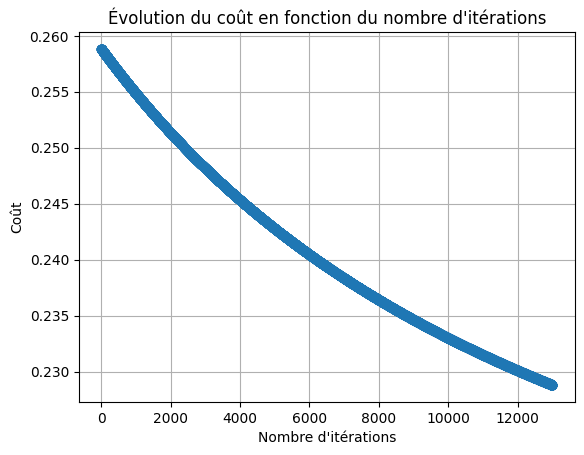

In [ ]:
# paramètres
iterations = 13000
alpha = 0.001
# Appel
cost_list = []
theta, cost_list,theta0_list,theta1_list= gradientDescent(X, y, theta, alpha, iterations)
print(cost_list)
print(theta)
tracer_cout_it(cost_list)

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [ ]:
def find_points(X, theta):
    x1_values = np.array([np.min(X[:, 1]), np.max(X[:, 1])]) # Plage de valeurs de x1
    x2_values = (-theta[0] - theta[1] * x1_values) / theta[2] # Calcul des valeurs de x2 en utilisant l'équation theta1*x1 + theta2*x2 = -theta0
    points = np.column_stack((x1_values, x2_values)) # Regrouper les valeurs de x1 et x2 en un tableau
    return points

In [ ]:
def drawLine(X, theta):
    points = find_points(X, theta)
    #plt.plot(points[:,0], points[:,1] ,label="Frontière de décision", color='red')
    plt.contourf(xx1, xx2, probs, levels=[0, 0.5, 1], colors=['blue', 'red'], alpha=0.3)
    plt.contour(xx1, xx2, probs, levels=[0.5], linewidths=1, colors='green')

# Affichage
Graphe representant les acceptations selon les caracteristiques

[[-11.12575993]
 [  0.47175159]
 [  0.44094837]]


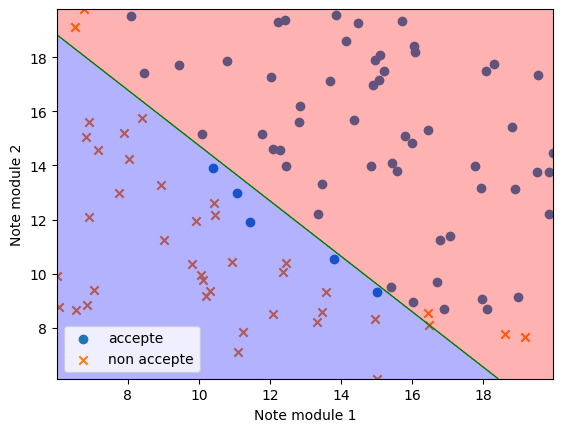

In [ ]:
print(theta)

plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')

plt.xlabel('Note module 1')
plt.ylabel('Note module 2')
plt.legend()
drawLine(X, theta)
plt.show()

Traçage du coût en fonction de theta0 et theta1

In [ ]:
def tracer_graphe(theta0_values, theta1_values, cost_values):
    theta0_array = np.array(theta0_values)
    theta1_array = np.array(theta1_values)
    cost_array = np.array(cost_values)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(theta0_array, theta1_array, cost_array, cmap='coolwarm')

    ax.set_xlabel('theta0')
    ax.set_ylabel('theta1')
    ax.set_zlabel('Coût')
    plt.show()

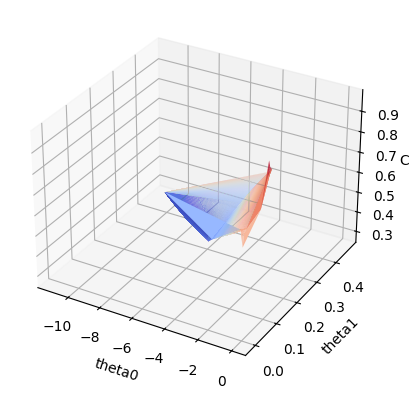

In [ ]:
tracer_graphe(theta0_list,theta1_list,cost_list)

Prédire des valeurs de y

In [ ]:
# Predire pour des notes note1= 9 et note2=17
proba = Sigmoid(np.matmul([1, 9, 17],theta))
predict= 1 if proba >= 0.5 else 0
predict

1

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

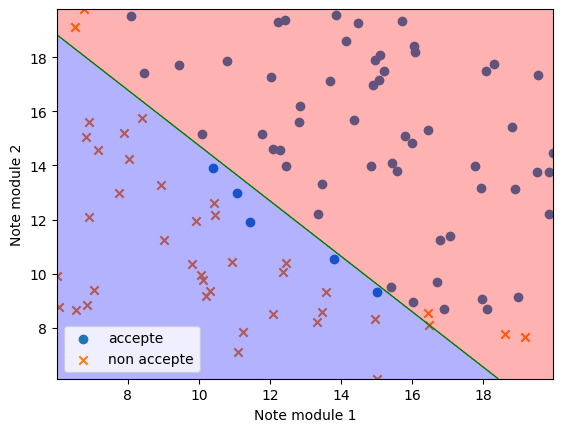

In [ ]:
# affichage
pos = y==1
neg = y==0

plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')
plt.xlabel('Note module 1')
plt.ylabel('Note module 2')
plt.legend()
# apprentissage
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', C=10**10, random_state=42)
model.fit(X, y)

# Plot decision boundary
x1_min, x1_max = X[:, 1].min(), X[:, 1].max()
x2_min, x2_max = X[:, 2].min(), X[:, 2].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[np.ones(xx1.ravel().shape), xx1.ravel(), xx2.ravel()]  # Add intercept term to grid
probs = model.predict_proba(grid)[:, 1].reshape(xx1.shape)
#plt.contour(xx1, xx2, probs, levels=[0.5], linewidths=1, colors='red')
plt.contourf(xx1, xx2, probs, levels=[0, 0.5, 1], colors=['blue', 'red'], alpha=0.3)
plt.contour(xx1, xx2, probs, levels=[0.5], linewidths=1, colors='green')
plt.show()

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

In [ ]:
1. #Taux d'apprentissage adaptatif : Utilisez des techniques telles que l'adaptation du taux d'apprentissage en fonction de la performance du modèle
# l'utilisation d'algorithmes d'optimisation avancés comme Adam peuvent aider à ajuster dynamiquement le taux d'apprentissage pendant l'entraînement.
2. #Augmentation des données : techniques d'augmentation des données pour générer des exemples supplémentaires à partir des données d'entraînement existantes, ce qui peut aider à améliorer la généralisation du modèle.
3. #Optimisation des hyperparamètres : Utilisez des techniques d'optimisation des hyperparamètres telles que la recherche par grille, la recherche aléatoire ou l'optimisation bayésienne pour trouver les meilleures valeurs des hyperparamètres du modèle

3.0

# Consignes

In [ ]:
# bonne chance